# Numerische Optimierung – Eindimensional

In diesem Notebook beschäftigt ihr euch mit dem Lösen von von Minimierungsproblemen. Solche Probleme kennt ihr bereits aus dem Analysisunterricht. 
Bei den Minimierungsproblemen auf diesem Arbeitsblatt soll der (globale) Minimalpunkt einer Funktion $f: \mathbb{R}\rightarrow \mathbb{R}$ bestimmt werden. Die Funktionen sind dabei zu komplex, um die Minimalpunkte über die Nullstellen der Ableitung zu bestimmen. 
Daher sollt ihr auf diesem Arbeitsblatt andere Ansätze für die Bestimmung von Minimalpunkten entwickeln und verschiedene Ansätze miteinander vergleichen. 

Die Leitfrage dieses Arbeitsblattes lautet:

<div id="information" class="alert alert-success">
  <h2>Die Leitfrage dieses Arbeitsblattes lautet:</h2>
Wie lässt sich im Falle einer zweidimensionalen, differenzierbaren Zielfunktion $f: \mathbb{R}\rightarrow \mathbb{R}$ iterativ ein (lokales) Minimum berechnen? Welche Aussagen über die Genauigkeit und die Kosten des Verfahrens lassen sich trefffen?
</div>


## Pakete laden

Zunächst werden einige Python-Pakete geladen. 

<div id="exercise" class="alert alert-info">
    Führe den Code aus. Klicke dazu in das Codefeld und drücke auf den <i class="fa fa-play"></i> - Button oder "Shift" + "Enter".
    Du brauchst keine Änderungen am Code vornehmen.
</div>

In [1]:
# Pakete laden
import numpy as np
import matplotlib.pyplot as plt

## Definition verschiedener Zielfunktionen

In dem folgenden Codefeld werden verschiedene Zielfunktionen definiert. 

<div id="exercise" class="alert alert-info">
    Führe den Code aus. Klicke dazu in das Codefeld und drücke auf den <i class="fa fa-play"></i> - Button oder "Shift" + "Enter".<br>
    Du kannst weitere Zielfunktionen hinzufügen. Dazu wurden bereits f2 und f3 als Platzhalter definiert. Du kannst dort beliebige Funktionsvorschriften eingeben. 
</div>


In [2]:
# Definiere verschiedener eindimensionale Zielfunktionen und der zugehörigen Ableitungen
def f1(x):
    return np.cos(x) - 2 * np.sin(0.6 * x - 2) + 1 * np.cos(2 * x - 2)

def grad_f1(x):
    df_dx = -1 * np.sin(x) - 2 * 0.6 * np.cos(0.6 * x - 2) - 1 * 2 * np.sin(2 * x - 2)
    return df_dx

def f2(x):
    return x

def f3(x):
    return x

# Lege fest, für welche Zielfunktion die Verfahren im Folgenden eingesetzt werden sollen
f = f1
grad_f_eindim = grad_f1

## Funktion zum Plotten der Funktion und der Iterationsschritte

Hier wird eine Funktion definiert, mit der wir uns die Iterationsschritte der Verfahren und den Funktionsgraphen ausgeben lassen können.

<div id="exercise" class="alert alert-info">
    Führe den Code aus. Klicke dazu in das Codefeld und drücke auf den <i class="fa fa-play"></i> - Button oder "Shift" + "Enter".
    Du brauchst keine Änderungen am Code vornehmen.
</div>


/var/folders/rx/t5y8zd9x1hncwkb4p21c9my53q8qs3/T/ipykernel_1081/3864247622.py:9: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if start_x == None:


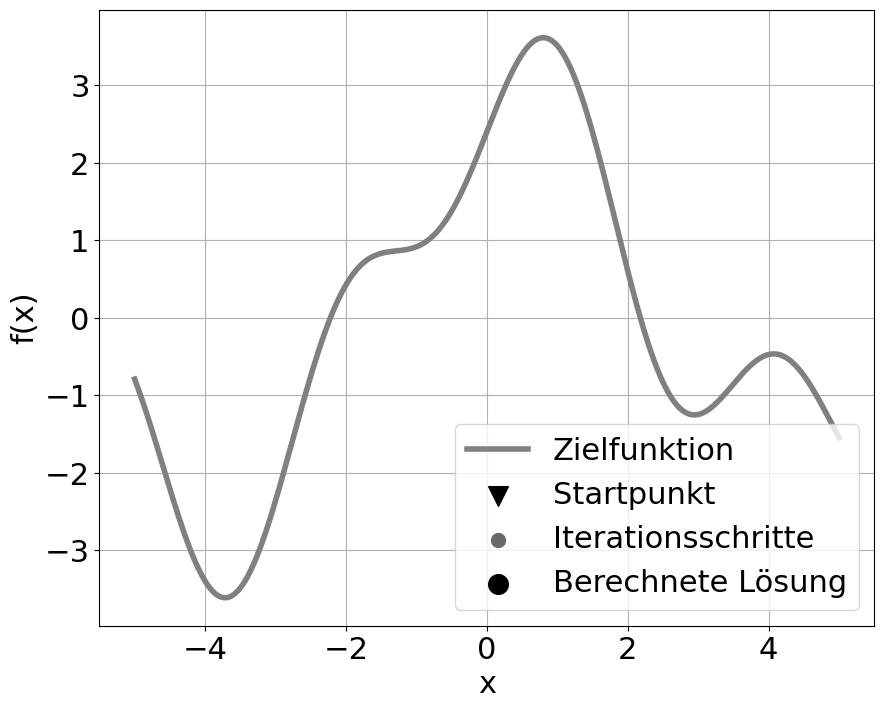

In [3]:
def plot_results(f, iterations, start_x, optimal_x, optimal_value):
    x = np.linspace(-5, 5, 400)
    y = np.array([f(xi) for xi in x])

    # Plot der Funktion
    plt.figure(figsize=(10, 8))
    plt.plot(x, y, label = 'Zielfunktion', linewidth = 4, color = 'grey')

    if start_x == None:
        None
    else: 
        plt.scatter(start_x, f(start_x), color='black', marker='v', s = 200, label='Startpunkt', zorder=4)
        plt.scatter(iterations[1:], [f(xi) for xi in iterations[1:]], marker='o', color='dimgray',  s = 100, label='Iterationsschritte',  zorder=3)
        plt.scatter(optimal_x, f(optimal_x), color='black', marker='o', s = 200, label='Berechnete Lösung', zorder=3)

    plt.xlabel('x', fontsize = 22)  
    plt.ylabel('f(x)', fontsize = 22)   

    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.legend(fontsize=22)
    plt.grid(True)
    # plt.savefig('../gradientenverfahren_1d_guenstig.png', dpi=300, bbox_inches='tight')

    return plt.show()

plot_results(f, [], np.array([]), np.array([]), np.array([]))



<div id="exercise" class="alert alert-info">
    <h3> Aufgabe </h3>
    Wie lässt sich ausgehend von einem beliebigen Punkt auf dem Funktionsgraphen schrittweise ein Minimalpunkt der Funktion finden? Notiere die Schritte deines Verfahrens. 
</div>


<div id="exercise" class="alert alert-info">
    <h3> Zusatzaufgabe </h3>
    In folgendem Codefeld kannst du dein Verfahren selbst umsetzen. Ein grobes Codegerüst ist bereits gegeben.
</div>

In [4]:
def mein_verfahren(f, start_x, stepsize, num_steps):
    
    # Lege den Startwert als ersten Iterationsschritt fest
    x = start_x
    
    # Liste  zum Speichern aller Iterationsschritte 
    iterations = [x]

    # Implementiere hier die Schritte deines Algorithmus
    for i in range(num_steps):
        
        x_new = 0 # Ersetze die "0" durch deine Iterationsvorschrift
        x = x_new        
    
    print("Optimales x:", x)
    print("Minimalwert von f(x):", f(x))
    
    return x, f(x), iterations

mein_verfahren(f,2.0,0.1,20)

Optimales x: 0
Minimalwert von f(x): 2.402448017104221


(0, 2.402448017104221, [2.0])

.

.

.

.

# Vergleiche verschiedene numerische Optimierungsverfahren

Im Folgenden sind drei numerische Optimierungsverfahren zum Lösen von Minimierungsproblemen implementiert:  
* Das Bergesteigerverfahren
* Das Vorzeichenverfahren 
* Das Ableitungsverfahren (auch Gradientenverfahren)

Bei allen drei Verfahren wird ausgehend von einem Startwert iterativ, d.h. schrittweise, eine Lösungs berechnet.
In diesem Notebook könnt ihr den Startwert und die Schrittweite variieren und untersuchen wie nah die berechnete Lösung an dem tatsächlichen globalen Minimalpunkt liegt. 

<div id="exercise" class="alert alert-info">
    <h3> Aufgabe </h3>
    <ul> 
        <li> Versuche die Iterationsvorschriften aller drei Verfahren nachzuvollziehen. 
        <li> Variiere dann den Startwert und die Schrittweite und führe die Verfahren erneut aus.
        <li> Diskutiere wie nah die berechnete Lösung bei den einzelnen Verfahren an dem tatsächlichen Minimalpunkt liegt.
        <li> Diskutiere Vor- und Nachteile der drei Verfahren. Berücksichtige dabei die Genauigkeit der Lösung und den benötigten Rechenaufwand. Den Rechenaufwand kannst du über die Anzahl der Funktionsauswertungen je Iterationsschritt abschätzen.
    </ul>
</div>

## Startwert und eine Schrittweite

<div id="exercise" class="alert alert-info">
    <h3> Aufgabe </h3>
    Wähle einen Startwert und eine Schrittweite. Lege zudem fest nach wie vielen Iterationen das Verfahren beendet werden soll. <br>
    Führe den Code aus.
</div>


In [5]:
# Startwert
start_x = 0.0 # ungünstig: 1.5, ideal: 0.0

# Schrittweite
stepsize = 0.2 # ungünstig: 0.4, ideal: 0.2

# Maximale Anzahl Iterationen
num_steps = 1000

## Das Bergsteigerverfahren <i class="fa fa-mountain"></i>
Beim Bergsteigerverfahrens werden die Funktionswerte $f(x^{(k)}-\alpha)$, $f(x^{(k)})$ und $f(x^{(k)}-\alpha)$ 
verglichen. Die nachfolgende Iterierte $x^{(k+1)}$ wird dann auf den Wert gesetzt, der zu einer Verbesserung des Funktionswertes im Vergleich zu $f(x^{(k)})$ geführt hat.


Im folgenden Codefeld wird das Bergsteigerverfahren implementiert und zur Minimierung unserer Zielfunktion angewendet. 


Optimales x: -3.800000000000001
Minimalwert von f(x): -3.5915900889413543


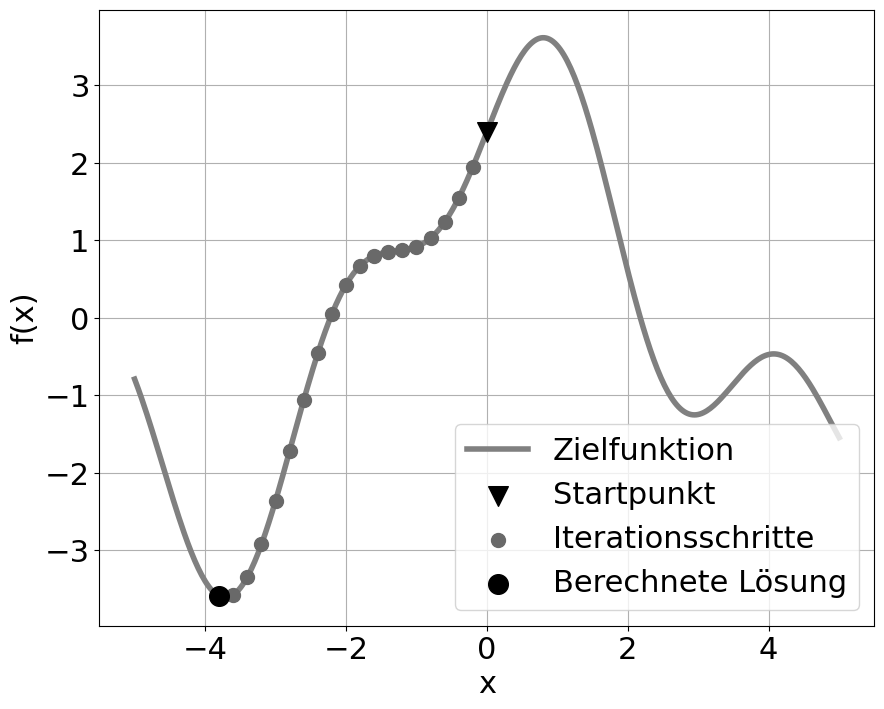

In [12]:
# Bergsteigerverfahren
def bergsteigerverfahren(f, start_x, stepsize, num_steps,tolerance=1e-6):
    
    # Aktueller x-Wert jedes Iterationsschrittes
    x = start_x

    # Liste zum Speichern aller Iterationspunkte (für die grafische Darstellung)
    iterations = [x]

    for i in range(num_steps):
        current_value = f(x)
        left_value = f(x - stepsize)
        right_value = f(x + stepsize)
        

        # Falls Funktionswert links kleiner als aktueller Funktionswert, gehe nach links
        if left_value < current_value:
            x_new = x - stepsize
            
        # Falls Funktionswert rechts kleiner als aktueller Funktionswert, gehe nach rechts
        elif right_value < current_value:
            x_new = x + stepsize
        else:
            break 
            
        if abs(x_new - x) < tolerance:
            break
        
        if abs(f(x_new) - f(x)) < tolerance:
            break
            
        if f(x_new) > f(x):
            break
        
        iterations.append(x_new)
        x = x_new
        

        
    print("Optimales x:", x)
    print("Minimalwert von f(x):", f(x))
    
    return x, f(x), iterations


# Anwendung des Verfahrens
optimal_x, optimal_value, iterations = bergsteigerverfahren(f, start_x, stepsize, num_steps)

plot_results(f,iterations,start_x, optimal_x, optimal_value)


## Das Vorzeichenverfahren (±1?)
Die Iterationsvorschrift des Vorzeichenverfahrens lautet:

$x^{(k+1)}:=x^{(k)}-\alpha\cdot1 \;\;\; \;\;\;\;\;\; \;\;\;\;\text{für} \;\;\;  f'(x^{(k)})>0 $  
$x^{(k+1)}:=x^{(k)}-\alpha\cdot(-1) \;\;\; \;\;  \; \;\;\text{für} \;\;\;  f'(x^{(k)})<0 $  
$x^{(k+1)}:=x^{(k)}-\alpha\cdot 0 = x^{(k)} \;\;\;  \text{für} \;\;\;  f'(x^{(k)})=0 $

Die Iterationsvorschrift kann mithilfe der sog. Signumfunktion $sgn$ (auch Vorzeichenfunktion genannt) mit
$
\operatorname{sgn}(x) = \begin{cases}
1 & \text{wenn } x > 0, \\
0 & \text{wenn } x = 0, \\
-1 & \text{wenn } x < 0.
\end{cases}
$
geschrieben werden als:

$x^{(k+1)}:=x^{(k)}-\alpha\cdot sgn(f'(x^{(k)})$.


In folgendem Codefeld wird das Vorzeichenverfahren implementiert.  


Optimales x: -3.8
Minimalwert von f(x): -3.5916


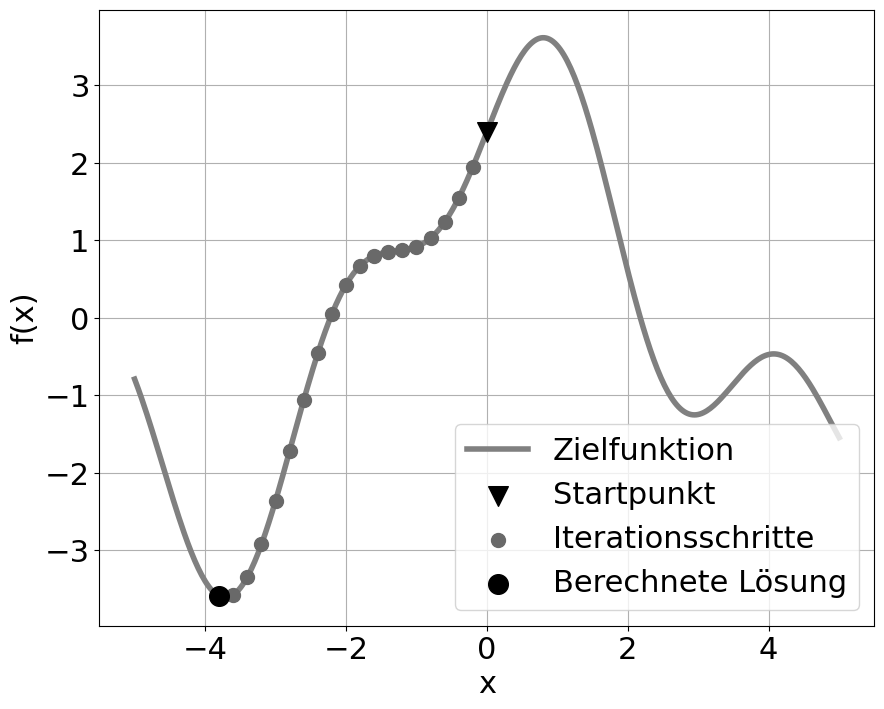

In [13]:
def sign_descent(f, start_x, stepsize, num_steps, tolerance=1e-6):
    x = start_x
    iterations = [x]
    
    for i in range(num_steps):
        grad = grad_f_eindim(x)
        x_new = x - stepsize * np.sign(grad) # np.sign berechnet das Vorzeichen des Ableitung an der aktuellen Iterierten (d.h. -1,0,1)
        
        if abs(x_new - x) < tolerance:
            break
        
        if abs(f(x_new) - f(x)) < tolerance:
            break
            
        if f(x_new) > f(x):
            break
        
        iterations.append(x_new)
        x = x_new

    print("Optimales x:", np.round(x,4))
    print("Minimalwert von f(x):", np.round(f(x),4))

    return x, f(x), np.array(iterations)

# Wende das Vorzeichenverfahren an
optimal_x, optimal_value, iterations = sign_descent(f, start_x, stepsize, num_steps)
plot_results(f, iterations,start_x, optimal_x, optimal_value)

## Das Ableitungsverfahren (auch Gradientenverfahren)
Die Iterationsvorschrift des Gradientenverfahrens lautet:

$x^{(k+1)}:=x^{(k)}-\alpha\cdot f'(x^{(k)} )$

In folgendem Codefeld wird das Gradientenverfahren implementiert. Versuche die einzelnen Schritte des Algorithmus nachzuvollziehen. 

Optimales x: -3.716
Minimalwert von f(x): -3.6109


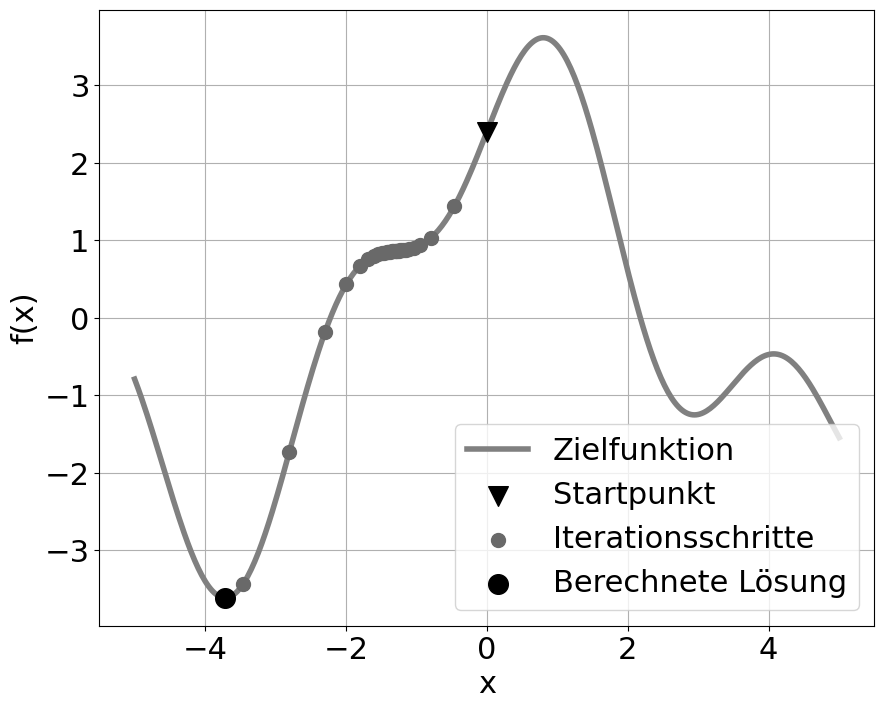

In [14]:
def gradient_descent(f, start_x, stepsize, num_steps, tolerance=1e-6):
    x = start_x
    iterations = [x]
    
    for i in range(num_steps):
        grad = grad_f_eindim(x)
        x_new = x - stepsize * grad
        
        
        
        if abs(x_new - x) < tolerance:
            break
            
        if abs(f(x_new) - f(x)) < tolerance:
            break
            
        if f(x_new) > f(x):
            break
            
        iterations.append(x_new)
        x = x_new
        
    print("Optimales x:", np.round(x,4))
    print("Minimalwert von f(x):", np.round(f(x),4))
    
    return x, f(x), np.array(iterations)

# Wende das Gradientenabstiegsverfahren an
optimal_x, optimal_value, iterations = gradient_descent(f, start_x, stepsize, num_steps)
plot_results(f, iterations,start_x, optimal_x, optimal_value)